## Imports

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data ready to be analized

In [58]:
italian_language_knowledge_df = pd.read_json('../../wikidump/output_language_refactored/itwiki_20210201_refactored_language_dataset.json.gz', compression='gzip', lines=True)
# italian_language_knowledge_df.head()

Number of rows and columns

In [59]:
italian_language_knowledge_df.shape

(12839, 5)

Info about the datatype of the Pandas dataframe

In [60]:
italian_language_knowledge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12839 entries, 0 to 12838
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      12839 non-null  int64 
 1   languages               12839 non-null  object
 2   edit_date               12839 non-null  object
 3   name                    12839 non-null  object
 4   num_languages_declared  12839 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 501.6+ KB


Basic stats

In [61]:
italian_language_knowledge_df.describe()

,id,num_languages_declared
count,1.283900e+04,12839.000000
mean,2.900178e+06,3.513202
std,2.318387e+06,1.878816
min,4.400000e+02,1.000000
25%,9.213530e+05,2.000000
50%,2.257129e+06,3.000000
75%,4.392922e+06,4.000000
max,8.813283e+06,43.000000


Exploding the languages array into something more readable

In [62]:
italian_languages_refactored_df = list()
# iterating over the previous dataset
for i, row in italian_language_knowledge_df.iterrows():
    # explicit the language and the knowledge, a line for each occurrence in languages list
    for el in row['languages']:
        new_row = row
        new_row = new_row.drop('languages')
        new_row['language'] = el['lang']
        new_row['level'] = el['level']
        italian_languages_refactored_df.append(new_row)
# build a new dataframe
italian_languages_refactored_df = pd.DataFrame(italian_languages_refactored_df).reset_index(drop=True)
# italian_languages_refactored_df.head()

Number of elements in the dataset

In [63]:
italian_languages_refactored_df.shape

(45262, 6)

Some info about the datatypes

In [64]:
italian_languages_refactored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45262 entries, 0 to 45261
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      45262 non-null  int64 
 1   edit_date               45262 non-null  object
 2   name                    45262 non-null  object
 3   num_languages_declared  45262 non-null  int64 
 4   language                45262 non-null  object
 5   level                   45262 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.1+ MB


Basic stats

In [65]:
italian_languages_refactored_df.describe()

,id,num_languages_declared,level
count,4.526200e+04,45262.000000,45262.000000
mean,2.880419e+06,4.519884,3.033626
std,2.298803e+06,3.017670,2.072037
min,4.400000e+02,1.000000,0.000000
25%,9.065510e+05,3.000000,1.000000
50%,2.254378e+06,4.000000,2.000000
75%,4.356360e+06,5.000000,6.000000
max,8.813283e+06,43.000000,6.000000


### Data cleaning

Null values

In [66]:
italian_languages_refactored_df.isnull().sum()

id                        0
edit_date                 0
name                      0
num_languages_declared    0
language                  0
level                     0
dtype: int64

Count all not null values

In [67]:
italian_languages_refactored_df.notnull().sum()

id                        45262
edit_date                 45262
name                      45262
num_languages_declared    45262
language                  45262
level                     45262
dtype: int64

### Basic plots

## Show the language occurrences specifications

Language and the associated count (the level associated should be greater than 0)

In [68]:
most_declared_languages = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] > 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
most_declared_languages.head()

,language,count
31,english,11704
54,italian,10537
37,french,5444
105,spanish,3523
41,german,2978


In [69]:
most_declared_languages.shape

(135, 2)

In [70]:
most_declared_languages.describe()

,count
count,135.000000
mean,316.496296
std,1476.270340
min,1.000000
25%,2.000000
50%,9.000000
75%,50.500000
max,11704.000000


Occurrences bar graph

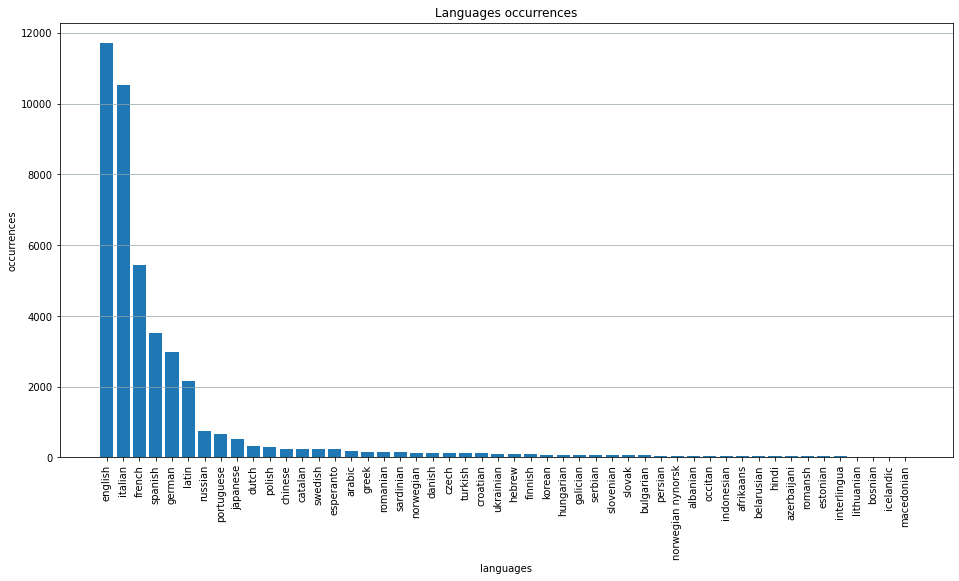

In [71]:
first_fifty = most_declared_languages[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

#### Pie chart of the languages with the greatest number of occurrences

The 6 most known languages compared to the other

In [72]:
split_index = 6
most_declared_languages_six = most_declared_languages[:split_index]
other = most_declared_languages[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
most_declared_languages_six = most_declared_languages_six.append(other, ignore_index = True)
most_declared_languages_six

,language,count
0,english,11704
1,italian,10537
2,french,5444
3,spanish,3523
4,german,2978
5,latin,2172
6,other,6369


Plot a pie chart

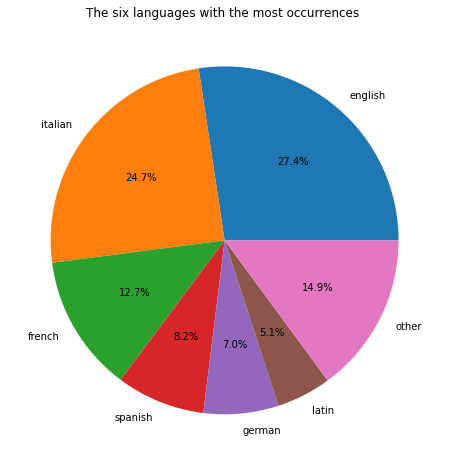

In [73]:
plt.figure(figsize=(16,8))
plt.pie(most_declared_languages_six['count'], labels=most_declared_languages_six['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences ')
plt.show()

Occurrences

In [74]:
occurrences = italian_languages_refactored_df.groupby(['language', 'level']).size().to_frame('count').reset_index().set_index(['language', 'level']).sort_values('count', ascending=False) 
occurrences.head()

count
language level       
italian  6       9070
english  3       4533
         2       4333
french   1       2417
         2       1618

Simple bar chart

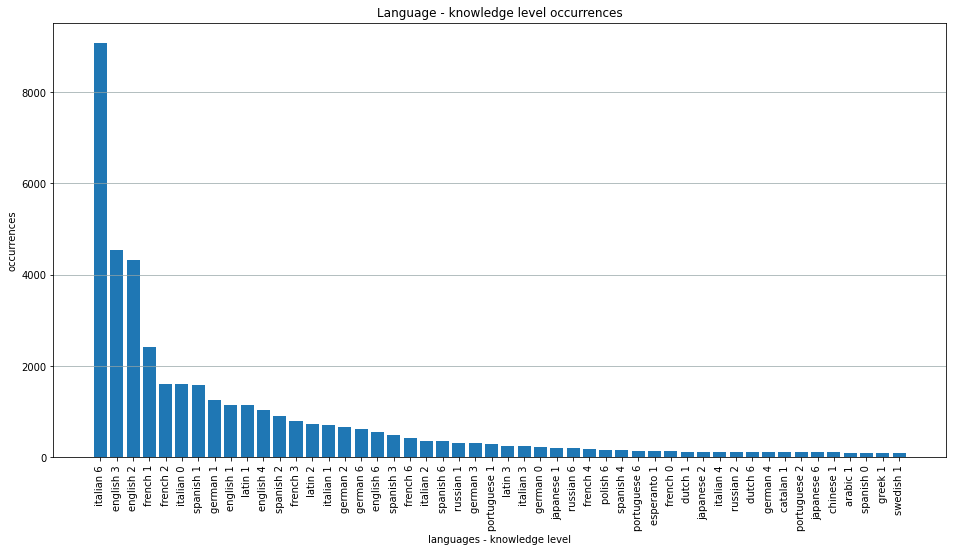

In [75]:
first_fifty = occurrences[:50]
labels = [ ' '.join([str(value[0]), str(value[1])]) for value in first_fifty.index.values ]
plt.figure(figsize=(16,8))
plt.bar(labels, first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Language - knowledge level occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages - knowledge level')
plt.show()

## Bar chart of means

In [76]:
means = italian_languages_refactored_df.groupby(['language'])['level'].mean().to_frame('mean').reset_index().sort_values('mean', ascending=False)
means.head()

,language,mean
129,venda,6.0
123,tonga,6.0
73,lingala,6.0
115,tagalog,6.0
1,afar,6.0


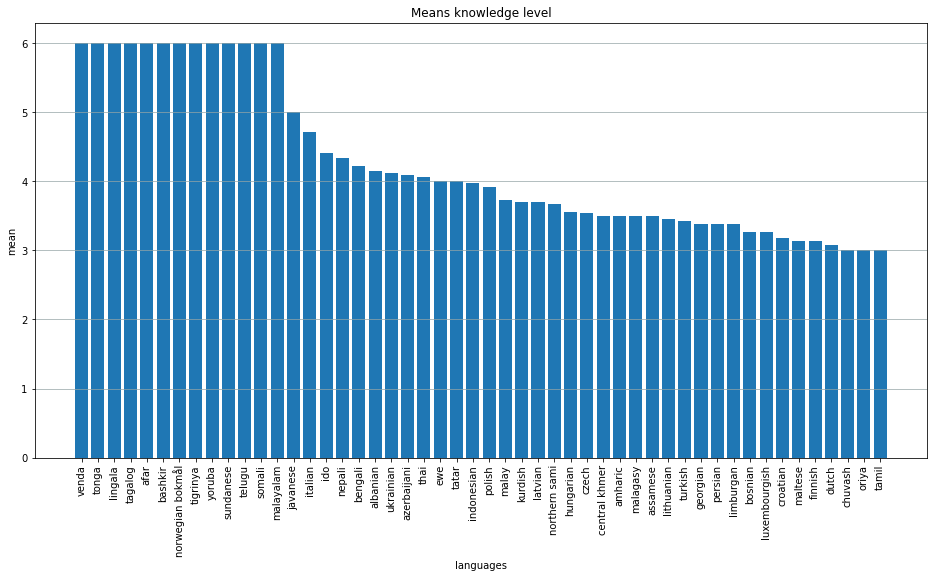

In [77]:
first_fifty = means[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['mean'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Means knowledge level')
plt.ylabel('mean')
plt.xlabel('languages')
plt.show()

## Native speaker analysis

In [78]:
native_speaker = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] == 6,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
native_speaker.head()

,language,count
39,italian,9070
30,german,623
23,english,560
27,french,419
75,spanish,353


Dimension

In [79]:
native_speaker.shape

(94, 2)

Bar chart

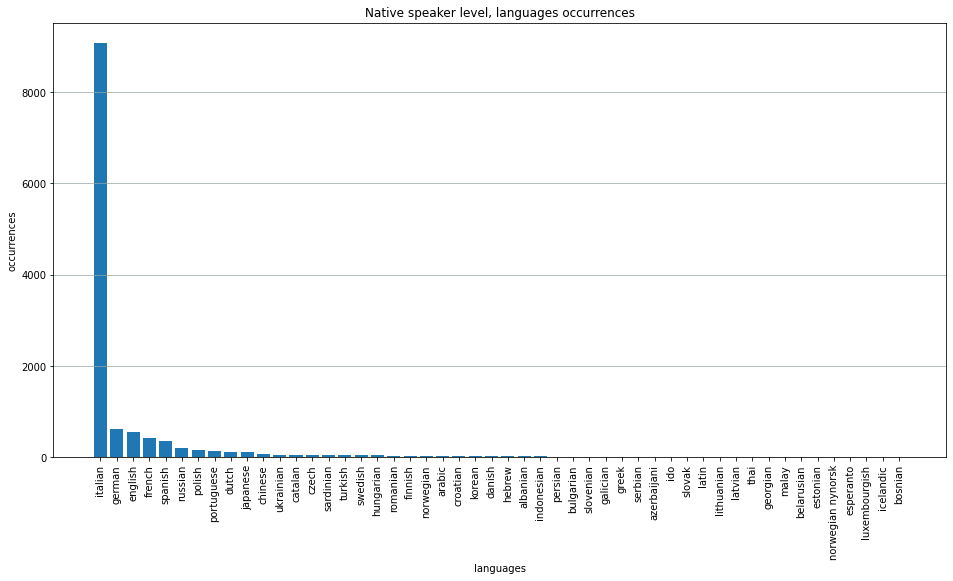

In [80]:
first_fifty = native_speaker[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Native speaker level, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six most known languages

In [81]:
split_index = 6
most_declared_languages_six = native_speaker[:split_index]
other = native_speaker[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
native_speaker = most_declared_languages_six.append(other, ignore_index = True)
native_speaker

,language,count
0,italian,9070
1,german,623
2,english,560
3,french,419
4,spanish,353
5,russian,199
6,other,1628


Pie chart using the six most known languages

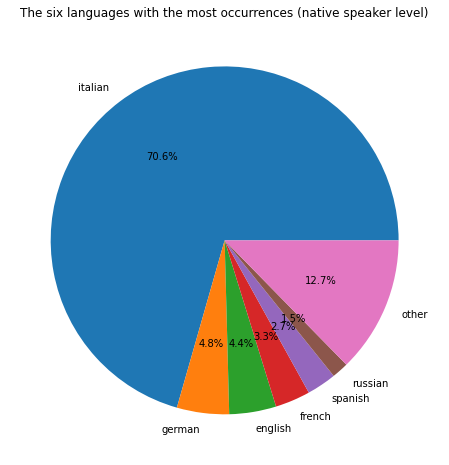

In [82]:
plt.figure(figsize=(16,8))
plt.pie(native_speaker['count'], labels=native_speaker['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (native speaker level)')
plt.show()

## Level 5 language knowledge

In [83]:
level_five = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] == 5,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_five.head()

,language,count
3,english,77
7,italian,22
5,french,13
13,spanish,8
6,german,5


Dimension

In [84]:
level_five.shape

(16, 2)

Bar chart

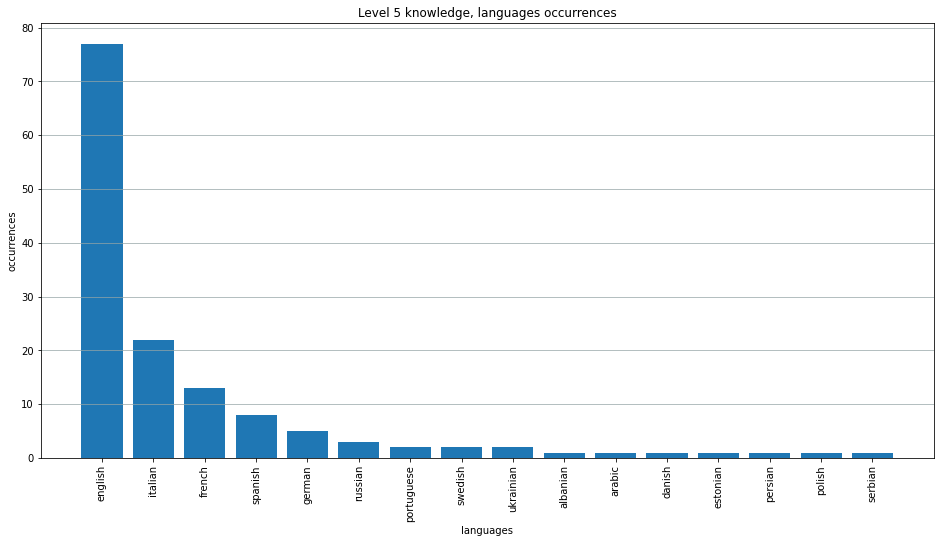

In [85]:
first_fifty = level_five[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 5 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six languages with the greatest amount of occurrences

In [86]:
split_index = 6
most_declared_languages_six = level_five[:split_index]
other = level_five[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_five = most_declared_languages_six.append(other, ignore_index = True)
level_five

,language,count
0,english,77
1,italian,22
2,french,13
3,spanish,8
4,german,5
5,russian,3
6,other,13


Pie chart

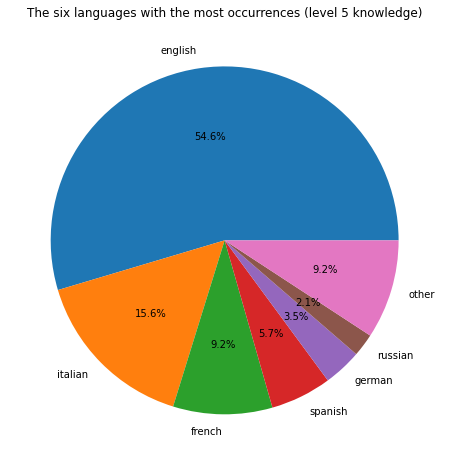

In [87]:
plt.figure(figsize=(16,8))
plt.pie(level_five['count'], labels=level_five['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 5 knowledge)')
plt.show()

## Level 4 language knowledge

In [88]:
level_four = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] == 4,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_four.head()

,language,count
11,english,1046
15,french,180
41,spanish,173
24,italian,124
17,german,118


In [89]:
level_four.shape

(49, 2)

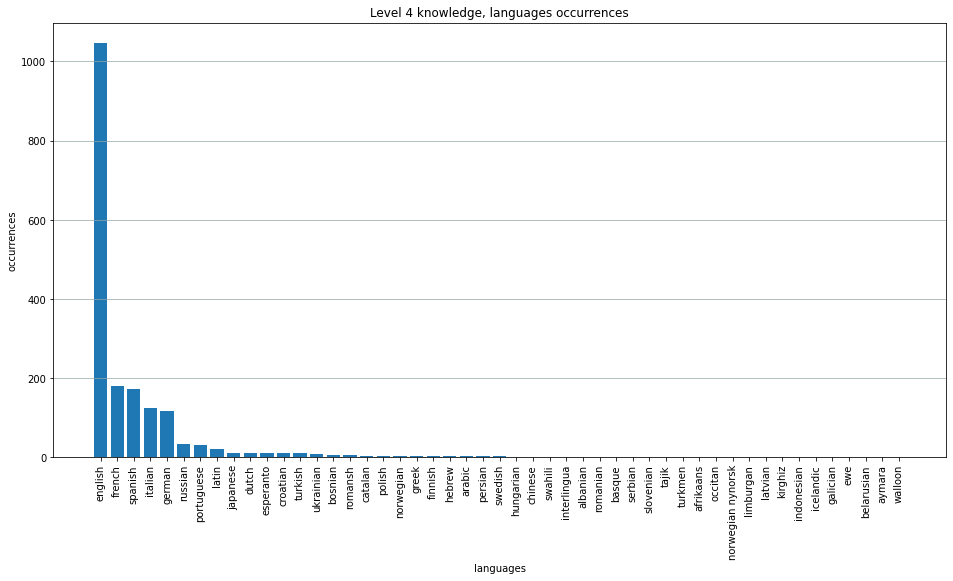

In [90]:
first_fifty = level_four[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 4 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [91]:
split_index = 6
most_declared_languages_six = level_four[:split_index]
other = level_four[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_four = most_declared_languages_six.append(other, ignore_index = True)
level_four

,language,count
0,english,1046
1,french,180
2,spanish,173
3,italian,124
4,german,118
5,russian,33
6,other,191


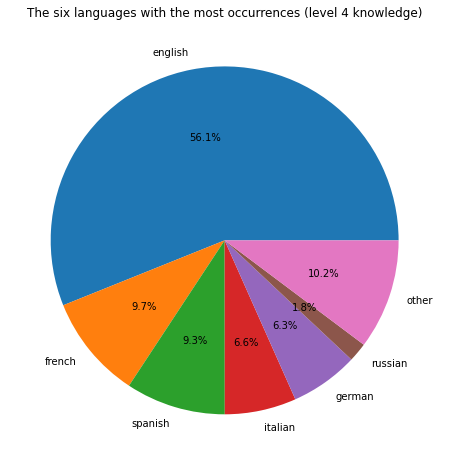

In [92]:
plt.figure(figsize=(16,8))
plt.pie(level_four['count'], labels=level_four['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 4 knowledge)')
plt.show()

## Level 3 language knowledge

In [93]:
level_three = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] == 3,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_three.head()

,language,count
14,english,4533
19,french,797
58,spanish,482
21,german,312
35,latin,258


In [94]:
level_three.shape

(66, 2)

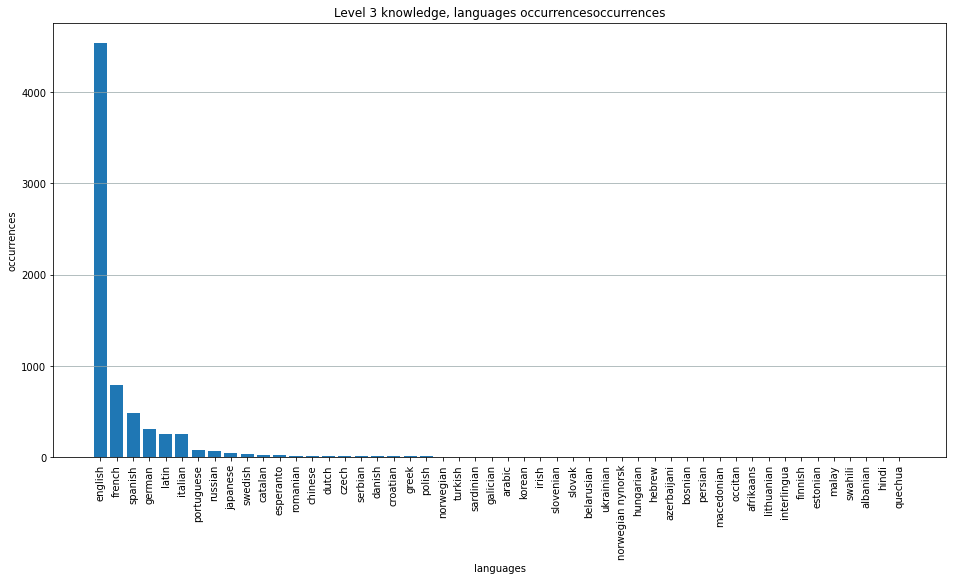

In [95]:
first_fifty = level_three[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 3 knowledge, languages occurrencesoccurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [96]:
split_index = 6
most_declared_languages_six = level_three[:split_index]
other = level_three[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_three = most_declared_languages_six.append(other, ignore_index = True)
level_three

,language,count
0,english,4533
1,french,797
2,spanish,482
3,german,312
4,latin,258
5,italian,256
6,other,597


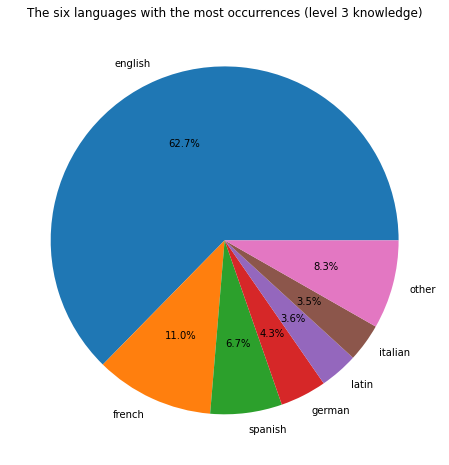

In [97]:
plt.figure(figsize=(16,8))
plt.pie(level_three['count'], labels=level_three['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 3 knowledge)')
plt.show()

## Level 2 language knowledge

In [98]:
level_two = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] == 2,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_two.head()

,language,count
19,english,4333
23,french,1618
66,spanish,912
42,latin,736
27,german,662


In [99]:
level_two.shape

(80, 2)

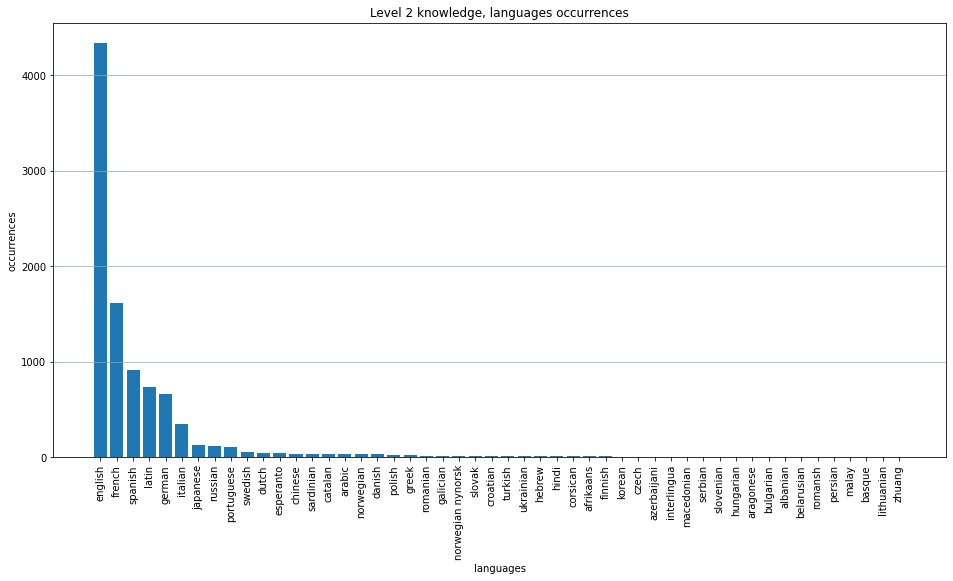

In [100]:
first_fifty = level_two[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 2 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [101]:
split_index = 6
most_declared_languages_six = level_two[:split_index]
other = level_two[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_two = most_declared_languages_six.append(other, ignore_index = True)
level_two

,language,count
0,english,4333
1,french,1618
2,spanish,912
3,latin,736
4,german,662
5,italian,354
6,other,1077


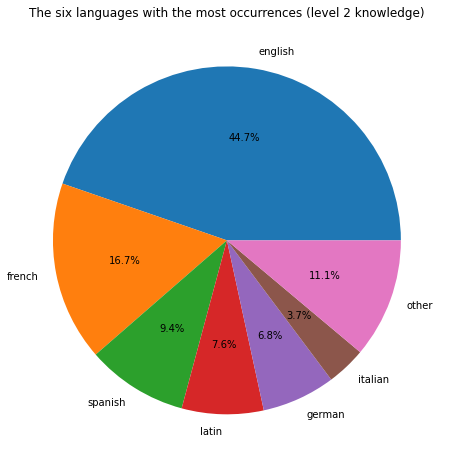

In [102]:
plt.figure(figsize=(16,8))
plt.pie(level_two['count'], labels=level_two['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 2 knowledge)')
plt.show()

## Level 1 language knowledge

In [103]:
level_one = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] == 1,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_one.head()

,language,count
30,french,2417
88,spanish,1595
34,german,1258
25,english,1155
56,latin,1145


In [104]:
level_one.shape

(107, 2)

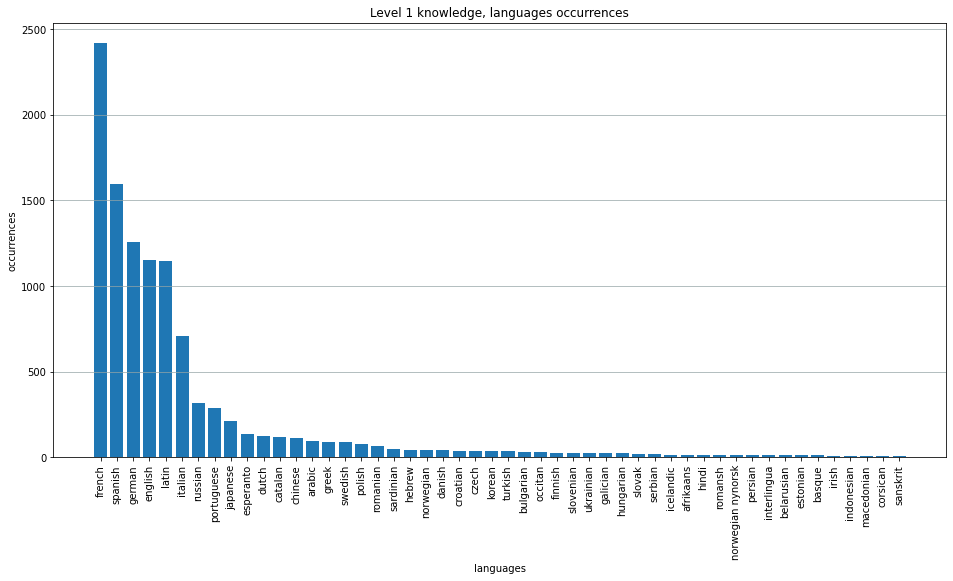

In [105]:
first_fifty = level_one[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 1 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [106]:
split_index = 6
most_declared_languages_six = level_one[:split_index]
other = level_one[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_one = most_declared_languages_six.append(other, ignore_index = True)
level_one

,language,count
0,french,2417
1,spanish,1595
2,german,1258
3,english,1155
4,latin,1145
5,italian,711
6,other,2661


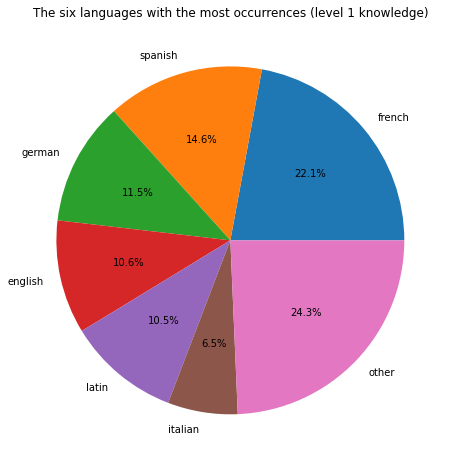

In [107]:
plt.figure(figsize=(16,8))
plt.pie(level_one['count'], labels=level_one['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 1 knowledge)')
plt.show()

## Level 0 language knowledge

In [108]:
level_zero = italian_languages_refactored_df.loc[italian_languages_refactored_df['level'] == 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_zero.head()

,language,count
29,italian,1602
19,german,227
16,french,130
53,spanish,97
30,japanese,69


In [109]:
level_zero.shape

(64, 2)

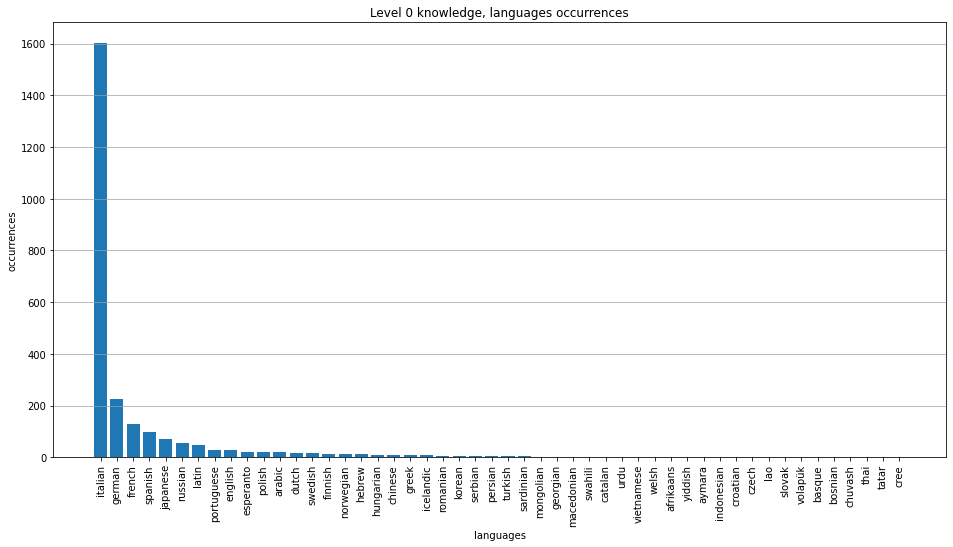

In [110]:
first_fifty = level_zero[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 0 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [111]:
split_index = 6
most_declared_languages_six = level_zero[:split_index]
other = level_zero[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_zero = most_declared_languages_six.append(other, ignore_index = True)
level_zero

,language,count
0,italian,1602
1,german,227
2,french,130
3,spanish,97
4,japanese,69
5,russian,56
6,other,354


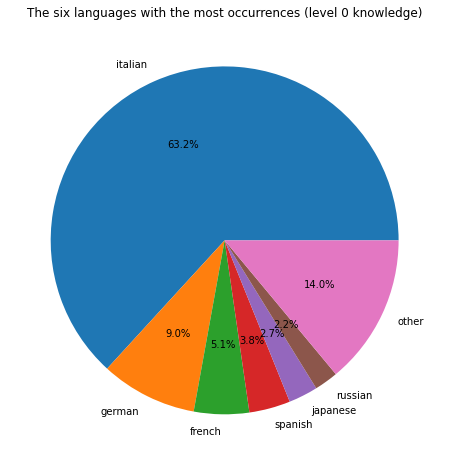

In [112]:
plt.figure(figsize=(16,8))
plt.pie(level_zero['count'], labels=level_zero['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 0 knowledge)')
plt.show()